On this notebook, candidate outliers will be detected and examined on a per case basis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_pickle('Datasets/New_variables.plk')

In [3]:
changes=data.loc[data['last_batter']==1]
normalized_data=StandardScaler().fit_transform(changes._get_numeric_data().iloc[:, 3:])

In [4]:
(np.abs(normalized_data)>3).sum()

2287

In [5]:
(np.abs(normalized_data)>3).sum() / (normalized_data.shape[0]*normalized_data.shape[1])

0.011937821021422308

In [6]:
outliers_count=(normalized_data>3).sum(axis=0)
outliers_count=pd.DataFrame([data._get_numeric_data().iloc[:, 3:].columns, outliers_count]).T
outliers_count

,0,1
0,postouts,0
1,post_runner_on_first,0
2,post_runner_on_second,0
3,post_runner_on_third,0
4,PostVisTeamScore,29
...,...,...
83,has_have_double,0
84,pas_since_home_run,7
85,has_have_home_run,0
86,pas_since_points_allowed,12


In [7]:
outliers_count=outliers_count.sort_values(1, ascending=False).reset_index(drop=True)
outliers_count.head(10)

,0,1
0,tying_run_on,195
1,walk,178
2,hot_cold_walk,159
3,double,127
4,points_allowed,99
5,hot_cold_double,95
6,hot_cold_home_run,79
7,home_run,78
8,inning_cum_double,70
9,inning_cum_post_runner_on_third,60


However, the first variables do not have true outliers; they are Boolean variables that happen infrequently.

In [8]:
changes[['inning_cum_double']].sort_values('inning_cum_double', ascending=False)

,inning_cum_double
44246,5
27969,4
45055,3
34826,3
18433,3
...,...
18693,0
18630,0
18581,0
18555,0


As in the previous variables; they are not true outliers, but rather some derivated variables coming from infrequent indicator variables. Moving down the list.

In [9]:
outliers_count.iloc[8:, :]

,0,1
8,inning_cum_double,70
9,inning_cum_post_runner_on_third,60
10,inning_cum_home_run,57
11,pas_since_field_out,47
12,pas_since_post_runner_on_first,47
...,...,...
83,single,0
84,post_runner_on_first,0
85,inning_cum_field_out,0
86,inning_cum_strikeout,0


In [10]:
changes[['pas_since_field_out']].sort_values('pas_since_field_out', ascending=False).reset_index(drop=True).head(50)

,pas_since_field_out
0,16.0
1,15.0
2,14.0
3,14.0
4,14.0
5,14.0
6,13.0
7,12.0
8,12.0
9,12.0


In [11]:
changes[['pas_since_post_runner_on_first']].sort_values('pas_since_post_runner_on_first', ascending=False).reset_index(drop=True).head(50)

,pas_since_post_runner_on_first
0,27.0
1,25.0
2,24.0
3,23.0
4,22.0
5,21.0
6,20.0
7,20.0
8,20.0
9,20.0


In [12]:
outliers_count.iloc[12:, :]

,0,1
12,pas_since_post_runner_on_first,47
13,pas_since_strikeout,44
14,inning_cum_points_allowed,42
15,hot_cold_points_allowed,41
16,double_header,38
...,...,...
83,single,0
84,post_runner_on_first,0
85,inning_cum_field_out,0
86,inning_cum_strikeout,0


In [13]:
display(changes[['PostVisTeamScore']].sort_values('PostVisTeamScore', ascending=False).reset_index(drop=True).head(10))
display(changes[['PostHomeTeamScore']].sort_values('PostHomeTeamScore', ascending=False).reset_index(drop=True).head(10))
display(changes[['score_diff']].sort_values('score_diff', ascending=False).reset_index(drop=True).head(10))

,PostVisTeamScore
0,20
1,17
2,16
3,16
4,15
5,15
6,15
7,15
8,13
9,13


,PostHomeTeamScore
0,21
1,15
2,14
3,14
4,12
5,12
6,11
7,11
8,11
9,11


,score_diff
0,20
1,15
2,15
3,14
4,14
5,13
6,13
7,12
8,12
9,12


This may be the first *true* outliers. However, they correspond to true game scores, and therefore there is no need to remove them, as they may have and important meaning for the final model. However, a cap will be used, to avoid extra noise generated by the high scoring games.

In [14]:
outliers_count.iloc[16:, :]

,0,1
16,double_header,38
17,pas_since_post_runner_on_second,34
18,inning_cum_single,33
19,cum_home_run,32
20,PostVisTeamScore,29
...,...,...
83,single,0
84,post_runner_on_first,0
85,inning_cum_field_out,0
86,inning_cum_strikeout,0


In [15]:
changes[['inning_pa']].sort_values('inning_pa', ascending=False).reset_index(drop=True).head(50)

,inning_pa
0,12
1,12
2,11
3,11
4,11
5,10
6,10
7,10
8,9
9,9


In [16]:
20/changes.shape[0]

0.009186954524575103

In [17]:
outliers_count.iloc[20:, :]

,0,1
20,PostVisTeamScore,29
21,PostHomeTeamScore,28
22,pas_since_single,23
23,inning_pa,23
24,inning_cum_post_runner_on_second,21
...,...,...
83,single,0
84,post_runner_on_first,0
85,inning_cum_field_out,0
86,inning_cum_strikeout,0


The rest of the variables with candidate outliers are either indicator variables or derived from low occuring indicator variables. 

In [18]:
display(changes[['PostVisTeamScore']].sort_values('PostVisTeamScore', ascending=False).reset_index(drop=True).head(50))
display(changes[['PostHomeTeamScore']].sort_values('PostHomeTeamScore', ascending=False).reset_index(drop=True).head(50))
display(changes[['score_diff']].sort_values('score_diff', ascending=False).reset_index(drop=True).head(50))

,PostVisTeamScore
0,20
1,17
2,16
3,16
4,15
5,15
6,15
7,15
8,13
9,13


,PostHomeTeamScore
0,21
1,15
2,14
3,14
4,12
5,12
6,11
7,11
8,11
9,11


,score_diff
0,20
1,15
2,15
3,14
4,14
5,13
6,13
7,12
8,12
9,12


In [19]:
data.loc[data['PostVisTeamScore']>17, 'PostVisTeamScore']=18
data.loc[data['PostHomeTeamScore']>15, 'PostHomeTeamScore']=16
data.loc[data['score_diff']>15, 'score_diff']=16

In [20]:
print(data['game_id'][data['PostVisTeamScore']>17])
print(data['game_id'][data['PostHomeTeamScore']>15])
print(data['game_id'][data['score_diff']>15])

44727    2019/09/10/oakmlb-houmlb-1
44728    2019/09/10/oakmlb-houmlb-1
44729    2019/09/10/oakmlb-houmlb-1
44730    2019/09/10/oakmlb-houmlb-1
44731    2019/09/10/oakmlb-houmlb-1
44732    2019/09/10/oakmlb-houmlb-1
44733    2019/09/10/oakmlb-houmlb-1
44734    2019/09/10/oakmlb-houmlb-1
44735    2019/09/10/oakmlb-houmlb-1
Name: game_id, dtype: object
44265    2019/09/08/seamlb-houmlb-1
44266    2019/09/08/seamlb-houmlb-1
44267    2019/09/08/seamlb-houmlb-1
44268    2019/09/08/seamlb-houmlb-1
44269    2019/09/08/seamlb-houmlb-1
44270    2019/09/08/seamlb-houmlb-1
Name: game_id, dtype: object
44268    2019/09/08/seamlb-houmlb-1
44269    2019/09/08/seamlb-houmlb-1
44270    2019/09/08/seamlb-houmlb-1
44727    2019/09/10/oakmlb-houmlb-1
44728    2019/09/10/oakmlb-houmlb-1
44729    2019/09/10/oakmlb-houmlb-1
44730    2019/09/10/oakmlb-houmlb-1
44731    2019/09/10/oakmlb-houmlb-1
44732    2019/09/10/oakmlb-houmlb-1
44733    2019/09/10/oakmlb-houmlb-1
44734    2019/09/10/oakmlb-houmlb-1
Name: 

The largest _PostHomeTeamScore_ and _score_diff_ happened on the same game.
Also, the largest _PostVisTeamScore_ and _score_diff_.

Finally, we will attempt to eliminate both opener pitchers and starters whose abysmal performance led to a soon exit. We will be looking for an inflection point on the number of plate appearances.

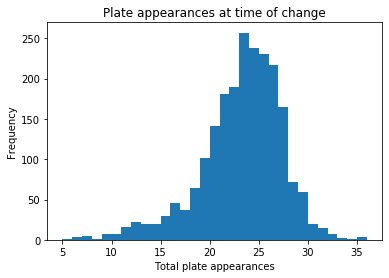

In [21]:
appearances = changes.pbp_idx.sort_values()
plt.hist(appearances, bins=31)
plt.title('Plate appearances at time of change')
plt.xlabel('Total plate appearances')
plt.ylabel('Frequency')
plt.show()

In [22]:
changes[['start_id', 'pbp_idx']].groupby('pbp_idx').count()

,start_id
pbp_idx,
5,1
6,4
7,5
8,1
9,7
10,7
11,16
12,22
13,19


10 may be the ideal plate appearance for the cutoff. Let's see some more information for them.

In [23]:
changes.loc[changes.pbp_idx<10, ['pbp_idx', 'inning', 'score_diff']]

,pbp_idx,inning,score_diff
2928,9,1,-6
8388,7,1,-3
13767,9,2,-1
17989,6,1,-3
22880,7,1,-3
25444,7,1,-6
25776,7,1,-4
27663,6,1,-3
27722,9,1,-4
28309,8,3,0


Most of them were on the first inning. The ones that lasted more than one inning weren't doing that bad. Thus, a better cutoff may be for pitchers that were changed on the first inning. What was the score?

In [24]:
changes.loc[changes.inning==1, ['pbp_idx', 'inning', 'score_diff']]

,pbp_idx,inning,score_diff
2928,9,1,-6
8388,7,1,-3
17989,6,1,-3
22880,7,1,-3
25444,7,1,-6
25776,7,1,-4
27663,6,1,-3
27722,9,1,-4
27958,12,1,-7
27969,11,1,-7


The score is always negative! They were changed because of really bad performance. Thus, pitchers that lasted one inning will be eliminated.

In [25]:
good_starters = changes.loc[changes.inning>1, 'start_id']
print('Number of removed pitchers: ' +  str(2177-len(good_starters)))

data=data.loc[data['start_id'].isin(good_starters), :].reset_index(drop=True)
print('Number of removed plate appearances: ' +  str(49520-len(data)))

Number of removed pitchers: 16
Number of removed plate appearances: 122


In [26]:
data.to_pickle('Datasets/Outliers.plk')
